# The effect of socioeconomic factors on credit card approval

**Authors:**
* Brian McGiffin / *directory id* / *uid*
* Walter Osborne / *directory id* / *uid*
* Cedric Prentice / cprentic / 117196856

## Introduction

Credit is an increasingly important tool for Americans. The increasing costs of products like [housing](https://www.whitehouse.gov/cea/written-materials/2021/09/09/housing-prices-and-inflation/), [cars](https://fred.stlouisfed.org/series/CUSR0000SETA02), and home appliances mean that it is difficult or impossible for most Americans to buy them outright. Besides allowing people to make larger purchases than they otherwise could have, people with good credit get another big advantage: better terms for almost all credit products. People with good credit can get higher credit limits, larger loan amounts (for things like mortgages), longer loan terms, and lower interest rates.  
  
Unfortunately, not everyone has an equal chance to reap the opportunities credit provides. Historic inequalities mean that African Americans, for example, face significant financial disadvantages compared to white Americans. According to the [Center for American Progress](https://www.americanprogress.org/article/systematic-inequality/), black households have fewer personal savings, and they are more likely to need to use those savings (because of negative income shocks). This lack of available financial resources causes black households to fall into more debt than white households. All that debt makes it harder to get lines of credit.  
  
By looking at existing credit approval data, we can investigate how socioeconomic factors, like ethnicity, citizenship, and occupation, affect credit approval and credit scores. Over this tutorial, we will cover the [data science lifecycle](https://www.datascience-pm.com/data-science-life-cycle/): data collection, data processing, exploratory analysis and data visualization, analysis, and interpretation.  
  
### Table of contents:

1. *TODO: Insert a table of contents here*
  
### Aside: [credit scores](https://www.investopedia.com/terms/c/credit_score.asp)

The most important datapoint of credit is the credit score. A credit score is a number that rates a consumer’s credit worthiness. It ranges from 300 to 850, with a higher score indicating a consumer that is more worthy. Lenders use it to evaluate the probability that a borrower will repay loans in a timely manner. There are five main factors that impact credit score:
1. Payment history (35% of score)
2. Total amount owed (30% of score)
3. Length of credit history (15% of score)
4. Types of credit (10% of score)
5. New credit (10% of score)

## Data collection

### Modules used

TODO: Provide description about the libraries we used and provide links to official documentation. This doesn't have to be long.

In [9]:
# Import the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Importing the data

The first step of the data science lifecycle is importing data. Our data is downloadable from [Kaggle](https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data), but it is originally sourced from The University of California, Irvine. **Note that certain columns have been rescaled to protect the anonymity of the applicants.** The data is hard to understand now, but in the next step we will clean it up and make it readable and usable for analysis.
  
The raw data is in CSV (Comma-Separated Value) format. To upload the data, we used the ```read_csv``` function from the [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) library.

In [10]:
# Load the data
cwd = os.getcwd()
df = pd.read_csv(cwd + '/crx.csv')
df

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## Processing the data

The data set we used has a pre-cleaned version and a raw version. Pre-cleaned data can make life easier, but we cleaned the raw data manually so it worked better for our analysis.  
  
**Important: Only run the data processing cells once! Running them multiple times will cause anomalies in the data and/or runtime errors!**

### Fixing the first row

Normally, the first line of text in a CSV file is the titles of the columns. However, the CSV file for this data did not have column names. The missing names caused the first entry in the data to be used as the column names for the dataframe instead. To fix this, we renamed the columns (the names are provided in [this file](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names) from UCI) and added another entry in the table with the values from the original column names.

In [11]:
# Rename all of the columns
df.rename(columns={
    'b': 'gender_raw',
    '30.83': 'age',
    '0': 'debt',
    'u': 'married_raw',
    'g': 'bank_customer_raw',
    'w': 'industry',
    'v': 'ethnicity',
    '1.25': 'years_employed',
    't': 'prior_default_raw',
    't.1': 'employed_raw',
    '01': 'credit_score',
    'f': 'drivers_license_raw',
    'g.1': 'citizen',
    '00202': 'zip_code',
    '0.1': 'income',
    '+': 'approved_raw'
}, inplace=True)

# Re add the first row to the dataframe
new_row = {
    'gender_raw': ['b'],
    'age': [30.83],
    'debt': [0],
    'married_raw': ['u'],
    'bank_customer_raw': ['g'],
    'industry': ['w'],
    'ethnicity': ['v'],
    'years_employed': [1.25],
    'prior_default_raw': ['t'],
    'employed_raw': ['t'],
    'credit_score': [1],
    'drivers_license_raw': ['f'],
    'citizen': ['g'],
    'zip_code': ['00202'],
    'income': [0],
    'approved_raw': ['+']
}
df_temp = pd.DataFrame(new_row)
df = pd.concat([df, df_temp], ignore_index=True)

### Missing values

Missing values in the original data were marked with “?”. To make processing them easier, we used [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) ```replace``` to swap the question marks with ```numpy.NaN```, a [Numpy constant](https://numpy.org/doc/stable/reference/constants.html#numpy.NaN) that represents a non number.  
  
There are initially 690 entries in the table. The Pandas ```dropna``` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) removes rows with missing values (NaN). If we remove all rows that have a missing value, there are 653 rows remaining. This means that 94.6% of the entries still remain. Because 100 - 94.6 = 5.4%, which is less than 10%, which means that it is okay to remove missing values instead of trying to estimate them. If removing all rows with missing values removed 25% of the data, for example, then it would be better to estimate missing values. Eliminating missing values is the best option for this data because most of the columns are categorical variables. These are hard to estimate without doing machine learning.

In [12]:
# Replace missing values with NaN
df.replace(to_replace='?', value=np.NaN, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender_raw           653 non-null    object 
 1   age                  653 non-null    object 
 2   debt                 653 non-null    float64
 3   married_raw          653 non-null    object 
 4   bank_customer_raw    653 non-null    object 
 5   industry             653 non-null    object 
 6   ethnicity            653 non-null    object 
 7   years_employed       653 non-null    float64
 8   prior_default_raw    653 non-null    object 
 9   employed_raw         653 non-null    object 
 10  credit_score         653 non-null    int64  
 11  drivers_license_raw  653 non-null    object 
 12  citizen              653 non-null    object 
 13  zip_code             653 non-null    object 
 14  income               653 non-null    int64  
 15  approved_raw         653 non-null    object 


### Type conversion

A small quirk of the dataframe is that age has type ```object```. We want it to be represented by a numeric datatype, so we can perform mathematical operations on it during analysis. To solve this, we used the built-in [type conversion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) Pandas has to convert the age values into ```float64```. We used the ```dtypes``` function, a Pandas dataframe function that displays the data types of every column in a dataframe, to easily verify the results of the conversion.

In [13]:
# Convert the age column from objects into floats
df['age'] = df['age'].astype(float)
df.dtypes

gender_raw              object
age                    float64
debt                   float64
married_raw             object
bank_customer_raw       object
industry                object
ethnicity               object
years_employed         float64
prior_default_raw       object
employed_raw            object
credit_score             int64
drivers_license_raw     object
citizen                 object
zip_code                object
income                   int64
approved_raw            object
dtype: object

### Cleaning categorical variables

The categorical variables in the data are represented with letters. This is hard to understand, and it will make analysis difficult. To fix this, we replaced the categorical variables with more readable values. Since some of the values were randomized for anonymity, we cross referenced the cleaned version of the data from Kaggle and [US Census statistics](https://data.census.gov/). This allows us to get the categorical data as close to the real values as we possibly can. We also changed a lot of the letters into numbers to aid analysis. Using numbers opens the door for performing regression and machine learning with the categorical data. In the code, we split the replacement by variable, so it is easier to read. However, all of the replacement could be done in the same loop for efficiency gains. When changing the values, we removed the original columns with the unhelpful data, so the table does not get overwhelming.

### Getting rid of unhelpful columns

Some of the randomized columns cannot be decoded. The industry and zip code columns have too many potential values and no good way to figure out what the values really represent. Because they are so vague, we do not want to include them in our analysis. The columns we dropped are the industry and zip code columns.

In [14]:
# Replace the existing gender values with numeric values
df.insert(1, 'gender', 0)
for index, row in df.iterrows():
    raw = df.at[index, 'gender_raw']
    if raw == 'b':
        df.at[index, 'gender'] = 1 # 1 represents male
    else:
        df.at[index, 'gender'] = 0 # 0 represents female
df.drop(columns=['gender_raw'], inplace=True)

# Replace the existing marriage statuses with a numeric value
df.insert(4, 'married', 0)
for index, row in df.iterrows():
    raw = df.at[index, 'married_raw']
    if raw == 'u':
        df.at[index, 'married'] = 1 # 1 represents a married person
    else:
        df.at[index, 'married'] = 0 # 0 represents anyone who isn't married
df.drop(columns=['married_raw'], inplace=True)

# Replace existing bank customer values with numeric values
df.insert(5, 'bank_customer', 0)
for index, row in df.iterrows():
    raw = df.at[index, 'bank_customer_raw']
    if raw == 'p':
        df.at[index, 'bank_customer'] = 0 # 0 represents someone without a bank account
    else:
        df.at[index, 'bank_customer'] = 1 # 1 represents someone with at least one bank account
df.drop(columns=['bank_customer_raw'], inplace=True)

# Replace existing ethnicity values with a more helpful names
for index, row in df.iterrows():
    raw = df.at[index, 'ethnicity']
    match raw:
        case 'bb':
            df.at[index, 'ethnicity'] = 'asian'
        case 'ff':
            df.at[index, 'ethnicity'] = 'latino'
        case 'h':
            df.at[index, 'ethnicity'] = 'black'
        case 'v':
            df.at[index, 'ethnicity'] = 'white'
        case _:
            df.at[index, 'ethnicity'] = 'other'

# Replace existing prior default, employed, and driver's license values with numeric values
df.insert(9, 'prior_default', 0)
df.insert(10, 'employed', 0)
df.insert(14, 'drivers_license', 0)
for index, row in df.iterrows():
    raw_default = df.at[index, 'prior_default_raw']
    raw_employed = df.at[index, 'prior_default_raw']
    raw_license = df.at[index, 'prior_default_raw']

    if raw_default == 't':
        df.at[index, 'prior_default'] = 1 # has defaulted on a loan before
    else:
        df.at[index, 'prior_default'] = 0 # has not defaulted on a loan before
    
    if raw_employed == 't':
        df.at[index, 'employed'] = 1 # employed
    else:
        df.at[index, 'employed'] = 0 # not employed

    if raw_license == 't':
        df.at[index, 'drivers_license'] = 1 # has a driver's license
    else:
        df.at[index, 'drivers_license'] = 0 # doesn't have a driver's license
df.drop(columns=['prior_default_raw', 'employed_raw', 'drivers_license_raw'], inplace=True)

# Replace existing citizenship values with meaningful strings
for index, row in df.iterrows():
    raw = df.at[index, 'citizen']
    match raw:
        case 'g':
            df.at[index, 'citizen'] = 'birth'
        case 'p':
            df.at[index, 'citizen'] = 'temporary'
        case 's':
            df.at[index, 'citizen'] = 'naturalized'

# Replace existing approval values with numeric values
df.insert(16, 'approved', 0)
for index, row in df.iterrows():
    raw = df.at[index, 'approved_raw']
    if raw == '+':
        df.at[index, 'approved'] = 1
    else:
        df.at[index, 'approved'] = 0

# Drop industry and zip code because they are unusable for our analysis (and approved_raw from the last step)
df.drop(columns=['approved_raw', 'industry', 'zip_code'], inplace=True)

df

,gender,age,debt,married,bank_customer,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,income,approved
0,0,58.67,4.460,1,1,black,3.04,1,1,6,1,birth,560,1
1,0,24.50,0.500,1,1,black,1.50,1,1,0,1,birth,824,1
2,1,27.83,1.540,1,1,white,3.75,1,1,5,1,birth,3,1
3,1,20.17,5.625,1,1,white,1.71,1,1,0,1,naturalized,0,1
4,1,32.08,4.000,1,1,white,2.50,1,1,0,1,birth,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,22.67,0.750,1,1,white,2.00,0,0,2,0,birth,394,0
686,0,25.25,13.500,0,0,latino,2.00,0,0,1,0,birth,1,0
687,1,17.92,0.205,1,1,white,0.04,0,0,0,0,birth,750,0
688,1,35.00,3.375,1,1,black,8.29,0,0,0,0,birth,0,0


### Cleaned data description

Keep in mind that some of the data was originally randomized for anonymity. We had to decode it to the best of our abilities. Many of the columns are self-explanatory, but a brief description of the confusing columns are below:
* Gender: 0 = female, 1 = male
* Married: 0 = single, divorced, etc.; 1 = married
* Drivers license: 0 = no license, 1 = license
* Approved: 0 = not approved for card, 1 = approved for card
* The credit score, outstanding debt, and income columns are rescaled for privacy, but the original distribution is preserved
* The zip code column and industry column were removed

## Exploratory analysis and data visualization

Exploratory data analysis helps us gain insights, identify patterns, and detect anomalies in the data. Identifying the main characteristics of the data is very helpful for:
* Understanding basic data patterns
* Determining appropriate modeling techniques
* Identifying potential biases
* Communicating our findings

### A quick look at age and race distribution

Two very important factors when examining wealth, debt, and credit are age and race. The generational wealth gap is a popular topic in the [media](https://fortune.com/2022/10/27/millennials-versus-boomers-wealth-gap-doubled/), and, as mentioned in the introduction, race plays a large role in wealth. Before performing more complex analysis, we want to look at the age and ethnic breakdown of the applicants in our data.  
  
To display the age distribution, we first used the Pandas ```describe``` method to get numeric values of the important statistics for ages. Then, we used Matplotlib to create a histogram of the data (documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).  
  
To view the proportions of different ethnicities, we used a pie chart. First, we created a deep copy of the original dataframe. This let us make significant changes to the data representation without messing up the original. We then dropped the irrelevant columns. To get the amount of applicants for each ethnicity, we did a [group by aggregation](https://www.w3schools.com/sql/sql_groupby.asp). This grouped all of the ethnicities and calculated how many applicants were in each ethnic category. Once we did that, we drew a pie chart using Matplotlib (documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)). We wanted to display the percentage of each ethnicity and the raw count, so we made a custom ```autopct``` function. This let us adjust how the value in each slice of the chart was formatted.

In [15]:
# Get some basic age summary statistics
df['age'].describe()

count    653.000000
mean      31.503813
std       11.838267
min       13.750000
25%       22.580000
50%       28.420000
75%       38.250000
max       76.750000
Name: age, dtype: float64

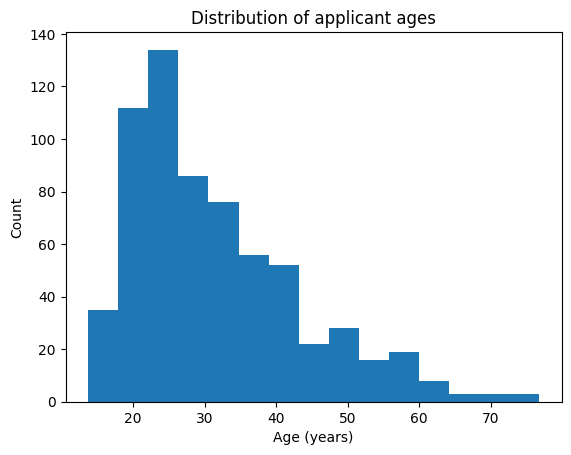

In [54]:
# Create a histogram of the age data
plt.hist(x=df.age, bins=15)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Distribution of applicant ages')
plt.show()

The histogram and numeric data show us some important facts about the age distribution:
* **The data is unimodal.** The only mode is clustered around the low-mid 20s
* **The data is not symmetric.** There is a heavy *right skew* on the histogram. Most of the data is centered around the younger ages (the median is 28.42 years). This makes sense because older people likely already have credit - they bought expensive things like cars and homes when they were younger, and now they do not spend as much. Older people probably opened their lines of credit at a younger age. It makes sense that younger people, who have recently entered the workforce, apply for credit at a higher rate. They want to start settling down, and having credit history is important for getting bigger loans.
* **There is a large spread.** The *range* of the data is ```76.75 - 13.75 = 63``` years. However, the *Interquartile Range (IQR)* is only ```38.25 - 22.58 = 15.67``` years. This suggests that the oldest people applying for credit are outliers.

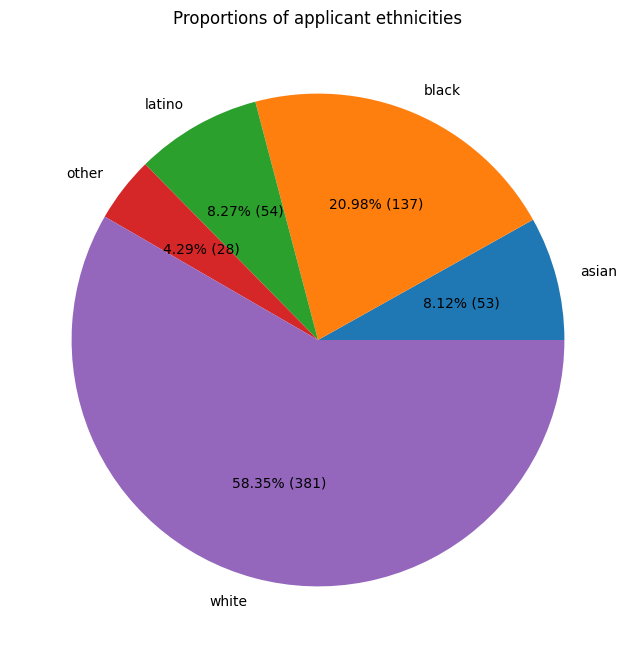

In [56]:
# Function for a customer autopct
def make_autopct(values):
    def my_autopct(pct):
        total = values.sum()
        val = int(round(pct * total / 100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
    return my_autopct

# Create a deep copy of the original dataframe and drop unneeded columns
df_age_pie = df.copy(deep=True)
df_age_pie.drop(columns=['gender', 'age', 'debt', 'married', 'bank_customer', 'years_employed', 'prior_default', 'employed', 'credit_score', 'drivers_license', 'citizen', 'income', 'approved'], inplace=True)

# Calculate the frequency of each ethnicity (black, white, asian, latino, or other)
df_age_pie = df_age_pie.groupby('ethnicity')['ethnicity'].count()

# Organize the values
df_age_pie.sort_values(ascending=False)
labels = list(map(str, df_age_pie.keys()))

# Draw the plot
plt.figure(figsize=(8, 8))
plt.pie(df_age_pie, labels=labels, autopct=make_autopct(df_age_pie))
plt.title('Proportions of applicant ethnicities')
plt.show()

The pie chart shows us that the majority of the credit card applicants are white. This makes sense because white people are the majority ethnic group. Black people apply for credit cards more than Latinos despite making up less of the American population. This data will be more useful later on when we look at how race impacts credit approval (and how it interacts with some other categories).